# House prices prediction (Advanced Regression)
## The general outline of the notebook is as follows - 
1) Exploring the data <br>
2) Replacing null values
<br>
3) Exploratory data analysis for categorical data <br>
4) Exploratory data analysis for numerical data <br>
5) Feature engineering <br>
6) Label encoding and normalisation <br>
7) Feature selection <br>
8) Modelling 


## Import necessary libraries and read the data -

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 6)
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
from IPython.display import display
import warnings

import warnings
warnings.filterwarnings("ignore")

In [393]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## I. Exploring the data - 

In [394]:
display(train_df.head())
display(test_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [395]:
display(train_df.shape)
display(test_df.shape)

(1460, 81)

(1459, 80)

In [396]:
display(train_df.describe())
display(test_df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [397]:
#Summary statistics for categorical values

display(train_df.describe(include= ['O']))
display(test_df.describe(include= ['O']))

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


## II. Replacing null values

In [398]:
#Looking at the null values in train dataframe

display(train_df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [399]:
#Looking at the null values in test dataframe

display(test_df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### Replacing null values for categorical values

In [400]:
combined_df = [train_df, test_df]

for i in combined_df:
    i['LotFrontage'][i['LotConfig']== 'Inside'] = i['LotFrontage'][i['LotConfig']== 'Inside'].fillna(i['LotFrontage'][i['LotConfig']== 'Inside'].median())
    i['LotFrontage'][i['LotConfig']== 'Corner'] = i['LotFrontage'][i['LotConfig']== 'Corner'].fillna(i['LotFrontage'][i['LotConfig']== 'Corner'].median())
    i['LotFrontage'][i['LotConfig']== 'FR2'] = i['LotFrontage'][i['LotConfig']== 'FR2'].fillna(i['LotFrontage'][i['LotConfig']== 'FR2'].median())
    i['LotFrontage'][i['LotConfig']== 'CulDSac'] = i['LotFrontage'][i['LotConfig']== 'CulDSac'].fillna(i['LotFrontage'][i['LotConfig']== 'CulDSac'].median())
    i['LotFrontage'][i['LotConfig']== 'FR3'] = i['LotFrontage'][i['LotConfig']== 'FR3'].fillna(i['LotFrontage'][i['LotConfig']== 'FR3'].median())


In [401]:
for i in combined_df:
    i['Alley'].replace(np.nan, 'NA', inplace= True)
    i['BsmtQual'].replace(np.nan, 'NA', inplace= True)
    i['BsmtCond'].replace(np.nan, 'NA', inplace= True)
    i['BsmtExposure'].replace(np.nan, 'NA', inplace= True)
    i['BsmtFinType1'].replace(np.nan, 'NA', inplace= True)
    i['BsmtFinType2'].replace(np.nan, 'NA', inplace= True)
    i['FireplaceQu'].replace(np.nan, 'NA', inplace= True)
    i['GarageType'].replace(np.nan, 'NA', inplace= True)
    i['GarageYrBlt'].replace(np.nan, 'NA', inplace= True)
    i['GarageFinish'].replace(np.nan, 'NA', inplace= True)
    i['GarageQual'].replace(np.nan, 'NA', inplace= True)
    i['GarageCond'].replace(np.nan, 'NA', inplace= True)
    i['PoolQC'].replace(np.nan, 'NA', inplace= True)
    i['Fence'].replace(np.nan, 'NA', inplace= True)
    i['MiscFeature'].replace(np.nan, 'NA', inplace= True)
    i['MSZoning'].replace(np.nan, 'NA', inplace= True)
    i['MasVnrType'].replace(np.nan, 'NA', inplace= True)
    i['Utilities'].fillna(i['Utilities'].mode()[0], inplace= True)
    i['Exterior1st'].fillna(i['Exterior1st'].mode()[0], inplace= True)
    i['Exterior2nd'].fillna(i['Exterior2nd'].mode()[0], inplace= True)
    i['KitchenQual'].fillna(i['KitchenQual'].mode()[0], inplace= True)
    i['Functional'].fillna(i['Functional'].mode()[0], inplace= True)
    i['SaleType'].fillna(i['SaleType'].mode()[0], inplace= True)

### Replacing null values for numerical values


In [402]:
for i in combined_df:
    i['MasVnrArea'].fillna(i['MasVnrArea'].median(), inplace= True)
    i['BsmtFinSF1'].fillna(i['BsmtFinSF1'].median(), inplace= True)
    i['BsmtFinSF2'].fillna(i['BsmtFinSF2'].median(), inplace= True)
    i['BsmtUnfSF'].fillna(i['BsmtUnfSF'].median(), inplace= True)
    i['TotalBsmtSF'].fillna(i['TotalBsmtSF'].median(), inplace= True)
    i['BsmtFullBath'].fillna(i['BsmtFullBath'].mode()[0], inplace= True)
    i['BsmtHalfBath'].fillna(i['BsmtHalfBath'].mode()[0], inplace= True)
    i['GarageCars'].fillna(i['GarageCars'].mode()[0], inplace= True)
    i['GarageArea'].fillna(i['GarageArea'].median(), inplace= True) 

In [403]:
for i in combined_df:
    i['YrSold'] = i['YrSold'].astype('object')
    i['MoSold'] = i['MoSold'].astype('object')
    i['MSSubClass'] = i['MSSubClass'].astype('object')
    i['OverallQual'] = i['OverallQual'].astype('object')
    i['OverallCond'] = i['OverallCond'].astype('object')
    i['YearBuilt'] = i['YearBuilt'].astype('object')
    i['YearRemodAdd'] = i['YearRemodAdd'].astype('object')
    i['BedroomAbvGr'] = i['BedroomAbvGr'].astype('object')
    i['KitchenAbvGrr'] = i['KitchenAbvGr'].astype('object')
    i['TotRmsAbvGrd'] = i['TotRmsAbvGrd'].astype('object')
    i['KitchenAbvGr'] = i['KitchenAbvGr'].astype('object')
    i['Fireplaces'] = i['Fireplaces'].astype('object')
    i['GarageCars'] = i['GarageCars'].astype('object')
    i['MiscVal'] = i['MiscVal'].astype('object')
display(i.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
KitchenAbvGrr    0
Length: 81, dtype: int64

## III. Exploratory data analysis for categorical data 

In [404]:
# Classifying categorical variables with SalePrice

train_objects = train_df.select_dtypes(include= 'object')
train_objects['SalePrice'] = train_df.loc[:,('SalePrice')]
train_objects.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,KitchenAbvGrr,SalePrice
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,NA,NA,NA,0,2,2008,WD,Normal,1,208500
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,NA,NA,NA,0,5,2007,WD,Normal,1,181500
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,NA,NA,NA,0,9,2008,WD,Normal,1,223500
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,NA,NA,NA,0,2,2006,WD,Abnorml,1,140000
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,NA,NA,NA,0,12,2008,WD,Normal,1,250000


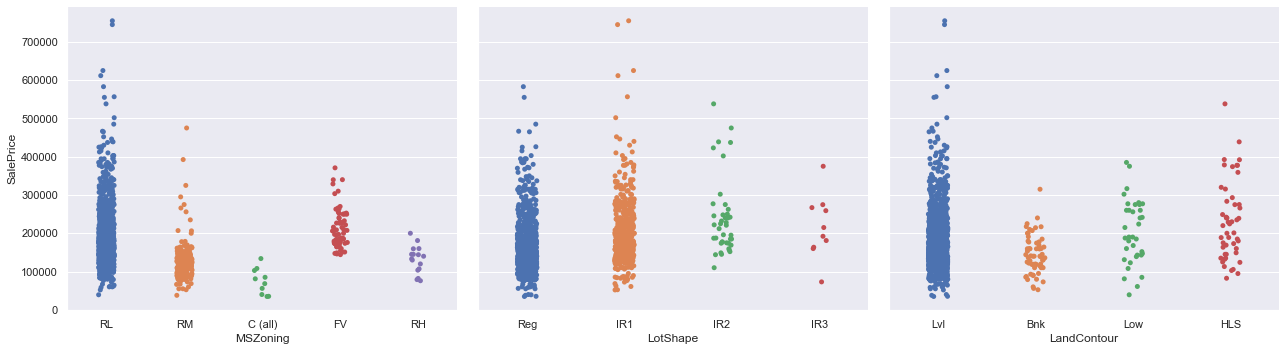

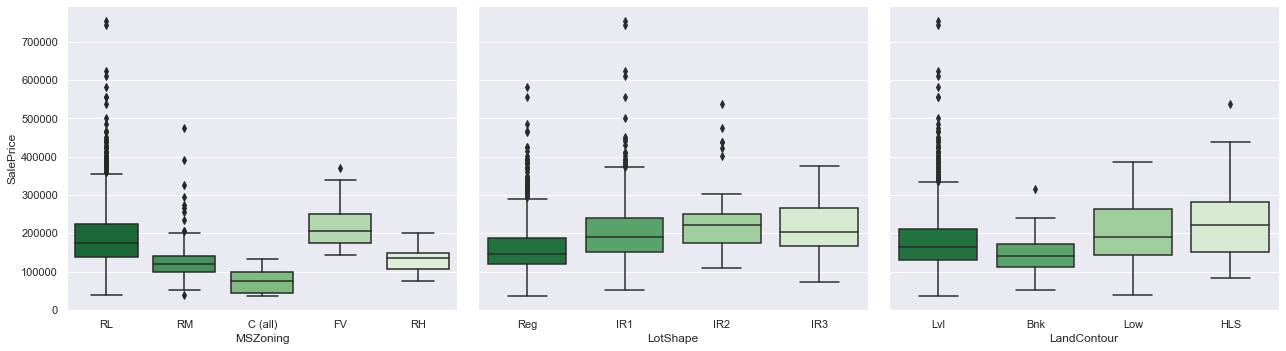

In [405]:
# Comparing SalePrice with MSZoning, LotShape and LandContour variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['MSZoning', 'LotShape', 'LandContour'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['MSZoning', 'LotShape', 'LandContour'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

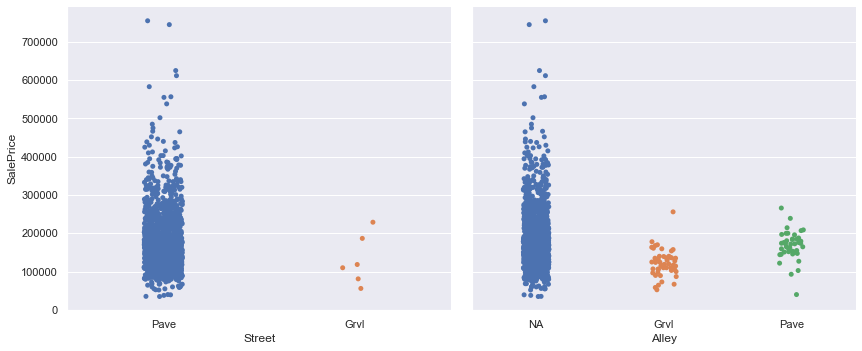

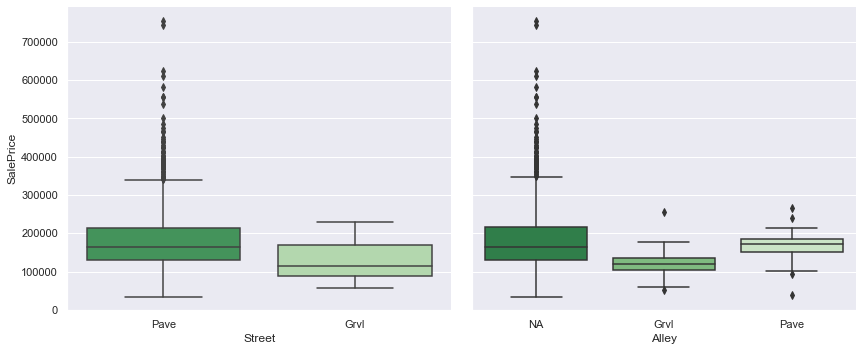

In [406]:
# Comparing SalePrice with Street and Alley variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['Street', 'Alley'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['Street', 'Alley'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

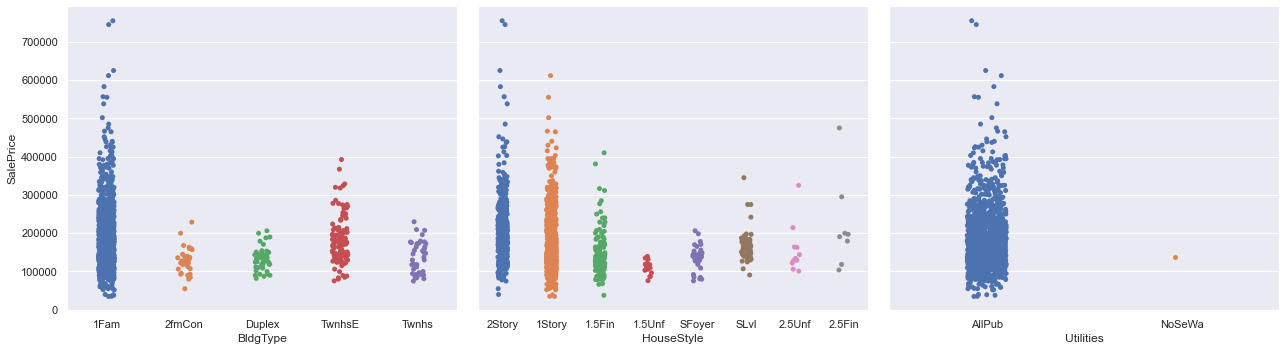

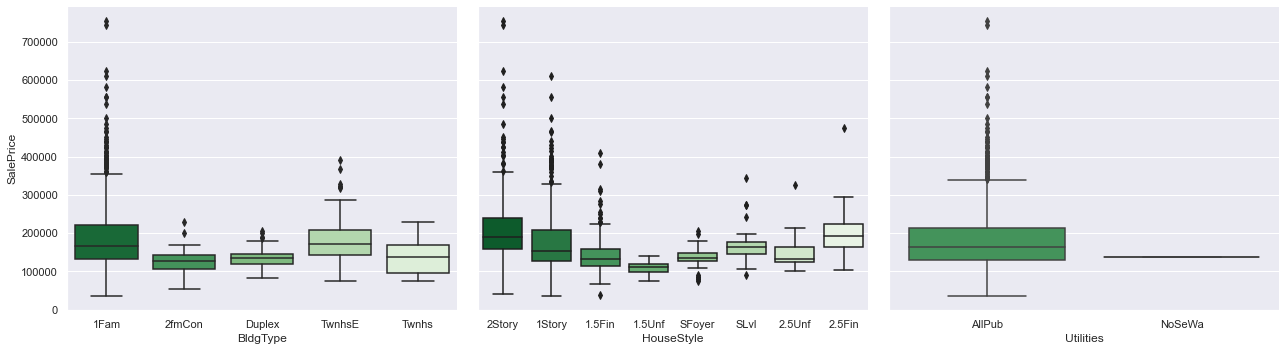

In [407]:
# Comparing SalePrice with building variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['BldgType', 'HouseStyle', 'Utilities'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['BldgType', 'HouseStyle', 'Utilities'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

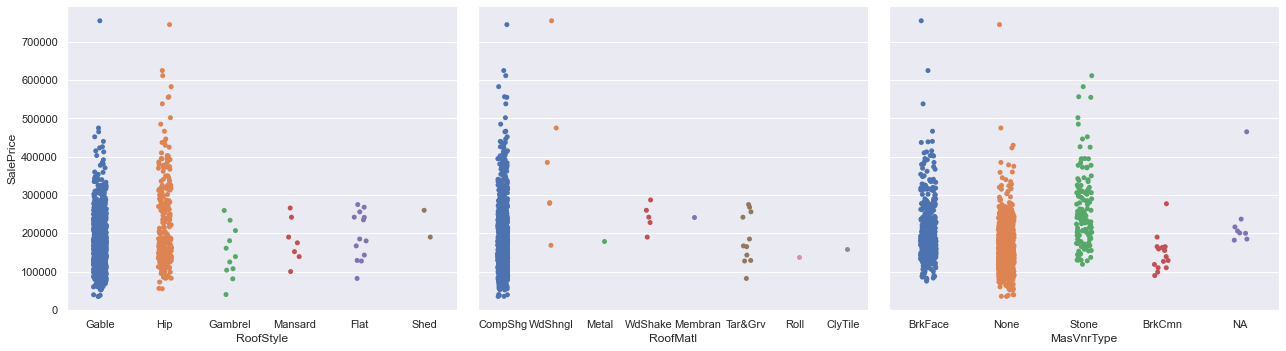

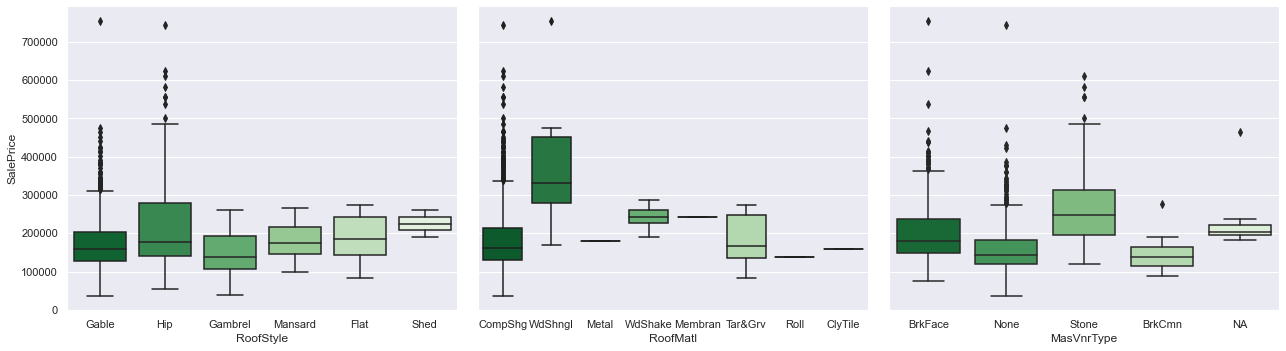

In [408]:
# Comparing SalePrice with roof variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['RoofStyle', 'RoofMatl', 'MasVnrType'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['RoofStyle', 'RoofMatl', 'MasVnrType'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

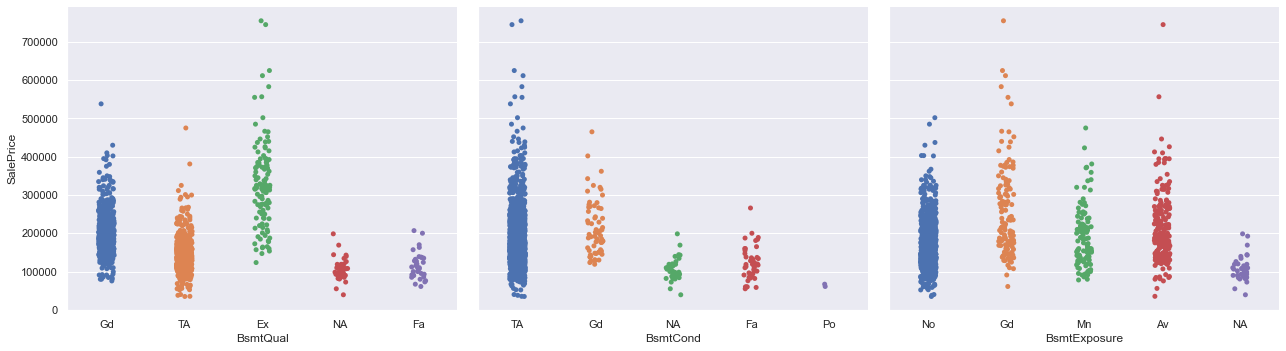

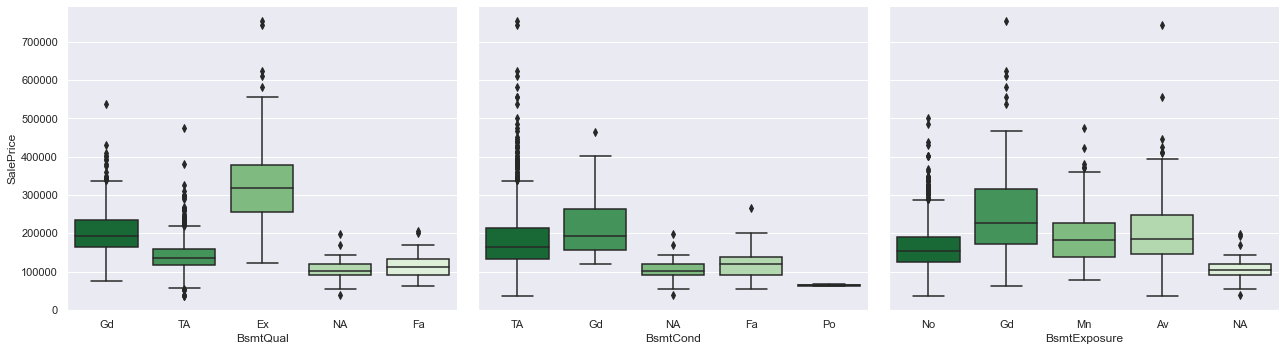

In [409]:
# Comparing SalePrice with basement variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['BsmtQual', 'BsmtCond', 'BsmtExposure'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['BsmtQual', 'BsmtCond', 'BsmtExposure'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

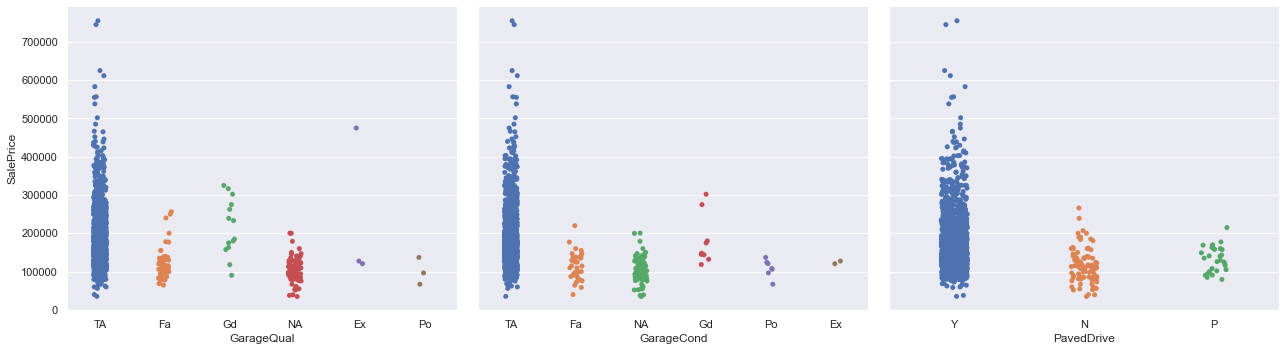

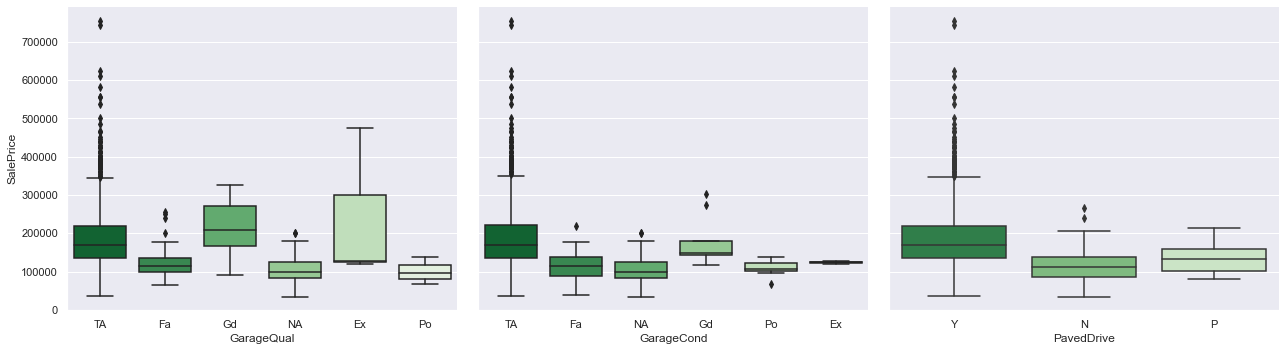

In [410]:
# Comparing SalePrice with garage variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['GarageQual', 'GarageCond', 'PavedDrive'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['GarageQual', 'GarageCond', 'PavedDrive'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

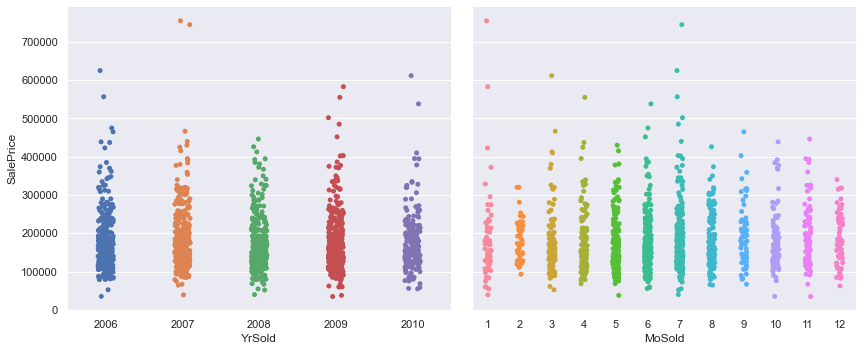

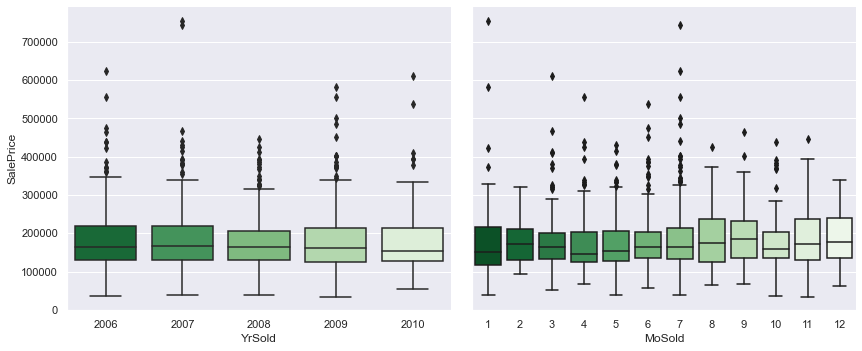

In [411]:
# Comparing SalePrice with year and month variables

g = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['YrSold', 'MoSold'],
                 height= 5, aspect= 1.2)

g.map(sns.stripplot, cmap= 'mediumseagreen')

f = sns.PairGrid(train_df, y_vars= 'SalePrice',
                 x_vars=['YrSold', 'MoSold'],
                 height= 5, aspect= 1.2)
f.map(sns.boxplot, palette= 'Greens_r')

## III. Exploratory data analysis for numerical data 

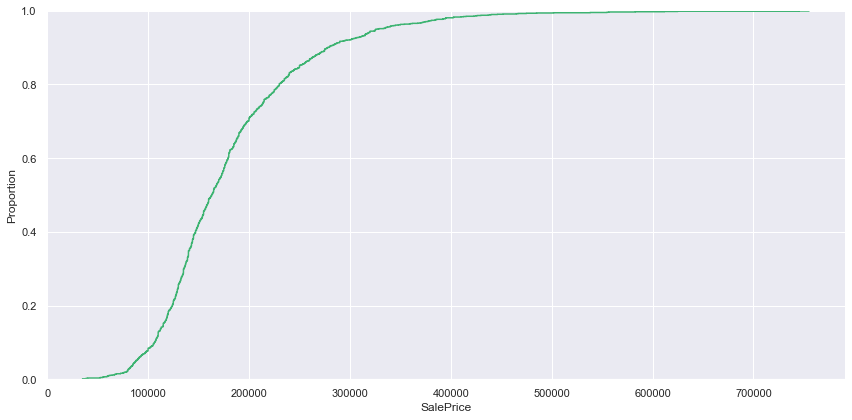

In [412]:
# Looking at SalePrice distribution

sns.displot(train_df['SalePrice'], kind= 'ecdf', color= 'mediumseagreen', height= 6, aspect= 2)
plt.show()

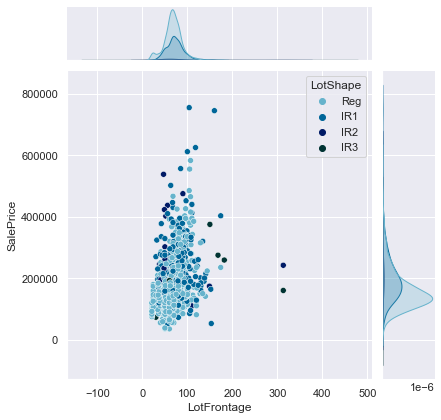

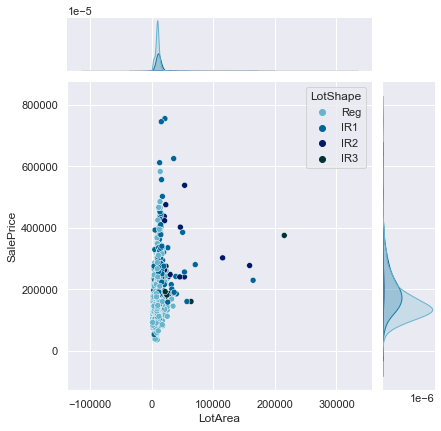

In [413]:
# Comparing SalePrice with lot size variables

sns.jointplot(data= train_df, x= 'LotFrontage', y= 'SalePrice', hue= 'LotShape', palette= 'ocean_r')
sns.jointplot(data= train_df, x= 'LotArea', y= 'SalePrice', hue= 'LotShape', palette= 'ocean_r')
plt.show()

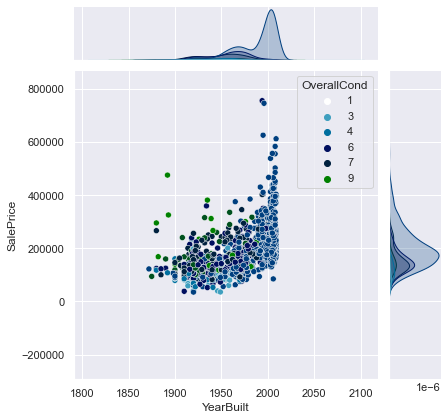

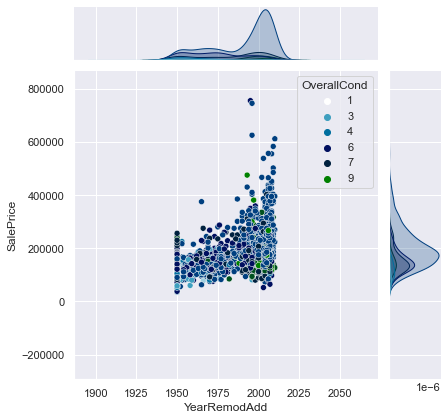

In [414]:
# Comparing SalePrice with year and overall condition variables

sns.jointplot(data= train_df, x= 'YearBuilt', y= 'SalePrice', hue= 'OverallCond', palette= 'ocean_r')
sns.jointplot(data= train_df, x= 'YearRemodAdd', y= 'SalePrice', hue= 'OverallCond', palette= 'ocean_r')
plt.show()

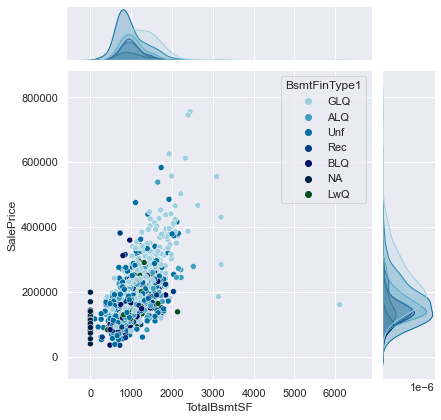

In [415]:
# Comparing SalePrice with basement variables

sns.jointplot(data= train_df, x= 'TotalBsmtSF', y= 'SalePrice', hue= 'BsmtFinType1', palette= 'ocean_r')
plt.show()

## V. Feature engineering

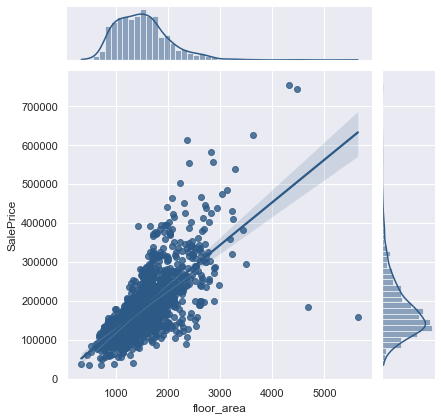

In [416]:
# Adding first floor and second floor area to get total area of two floors and comparing the same with sale price
for i in combined_df:
    i['floor_area'] = i['1stFlrSF'] + i['2ndFlrSF']
sns.jointplot(data= train_df, x= 'floor_area', y= 'SalePrice', kind= 'reg', color= '#2d5986')
plt.show()

In [417]:
# Feature engineering variables to get the total square feet of the house and total number of bathrooms

for i in combined_df:
    i['Total_Sqft'] = i['GrLivArea'] + i['TotalBsmtSF'] 
    i['Total_Bathrooms'] = i['FullBath'] + i['HalfBath'] * 0.5 + i['BsmtFullBath'] + i['BsmtHalfBath'] * 0.5


In [418]:
# Dropping columns that were used to feature engineer columns

for i in combined_df:
    i.drop(['GrLivArea','TotalBsmtSF'], axis= 1, inplace= True )
    i.drop(['FullBath', 'HalfBath','BsmtFullBath', 'BsmtHalfBath'], axis= 1, inplace= True )
    i.drop(['1stFlrSF', '2ndFlrSF'], axis= 1, inplace= True )


## VI. Label encoding and normalisation

In [419]:
# Label encoding categorical values using sklearn's LabelEncoder

from sklearn.preprocessing import LabelEncoder

Y_categorical_selection = train_objects['SalePrice'].values
X_categorical_selection = train_objects.drop('SalePrice', axis= 1)
le = LabelEncoder()
objList = X_categorical_selection.columns
for i in objList:
    X_categorical_selection[i] = le.fit_transform(X_categorical_selection[i].astype(str))



In [420]:
# Classifying only numerical data from train_df

train_numeric = train_df.select_dtypes(exclude= 'object')

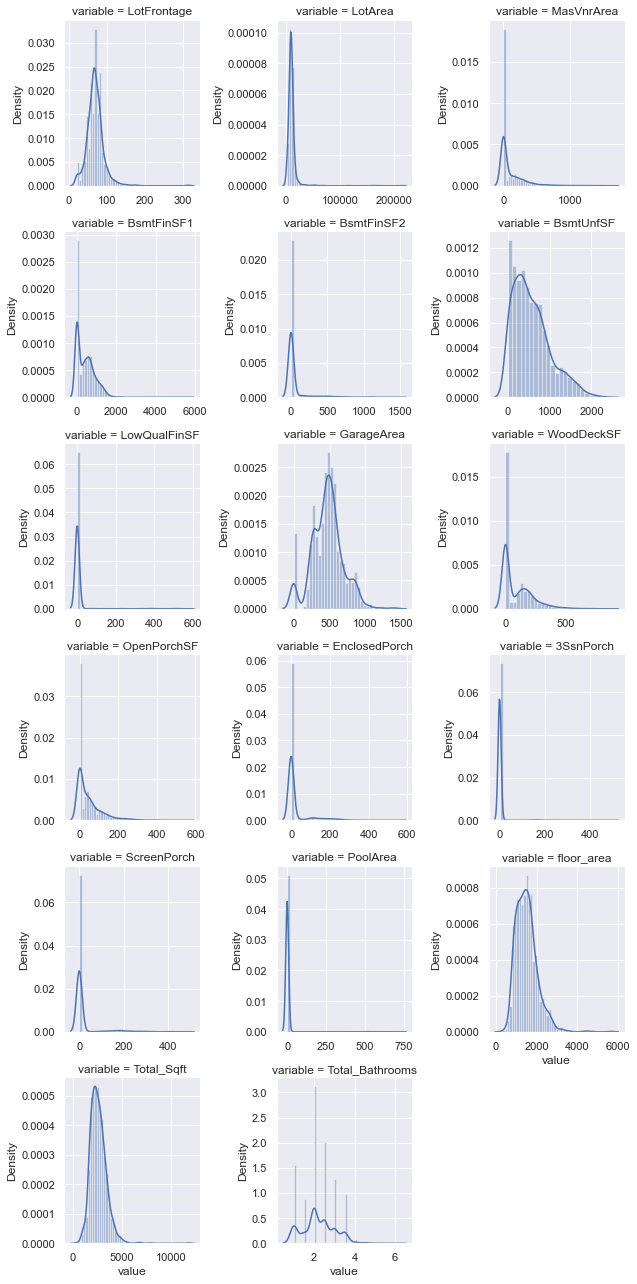

In [421]:
# Displaying the distribution of numerical data in train_df

X_numeric = train_numeric.drop(['SalePrice', 'Id'], axis= 1)
Y_numeric = train_numeric.loc[:, ['SalePrice']]
X_columns = X_numeric.columns

f = pd.melt(X_numeric, value_vars= X_columns)
g = sns.FacetGrid(f, col= 'variable',  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [422]:
# Normalising numerical data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_numeric[X_numeric.columns] = scaler.fit_transform(X_numeric[X_numeric.columns])
Y_numeric[Y_numeric.columns] = scaler.fit_transform(Y_numeric[Y_numeric.columns])
X_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,floor_area,Total_Sqft,Total_Bathrooms
0,-0.203045,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.120242,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.384619,-0.008372,1.642256
1,0.465831,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,-0.120242,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.475290,-0.059386,0.368581
2,-0.069270,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.120242,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.530497,0.161672,1.642256
3,-0.426004,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.120242,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,0.398055,-0.121330,-0.268257
4,0.644198,0.375148,1.366489,0.463568,-0.288653,-0.174865,-0.120242,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,1.321306,0.935372,1.642256


## VII. Feature selection

In [423]:
# Feature selecting categorical data using ANOVA test

from sklearn.feature_selection import f_regression, SelectKBest
fs = SelectKBest(score_func= f_regression, k= 5)
fs_fit = fs.fit(X_categorical_selection, Y_categorical_selection)

<AxesSubplot:xlabel='columns', ylabel='F-Score'>

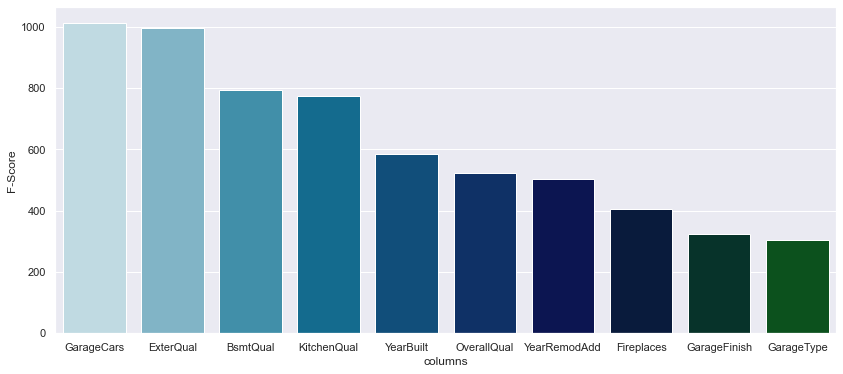

In [424]:
# Displaying the top 10 categorical data to feature select

feature_cols = pd.DataFrame(objList)
pvalues = pd.DataFrame(np.round(fs_fit.pvalues_, 4))
f_scores = pd.DataFrame(fs_fit.scores_)
anova_test = pd.concat([feature_cols, pvalues, f_scores], axis= 1)
anova_test.columns = ['columns', 'P-Value', 'F-Score']
top_columns_anova = anova_test.nlargest(10, columns=  'F-Score')
sns.barplot(x= 'columns', y= 'F-Score', data= top_columns_anova, palette= 'ocean_r')

In [425]:
# Splitting the data into train and test to fit a lasso regression model to feature select numerical data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_numeric, Y_numeric, test_size= 0.2, random_state= 2)

{'alpha': 0.02}

array([ 0.        ,  0.01795325,  0.09261035,  0.        , -0.01390106,
        0.        , -0.02454208,  0.20638978,  0.05967626,  0.        ,
       -0.01369105,  0.        ,  0.01365231, -0.01762982,  0.03373752,
        0.4238208 ,  0.19036104])

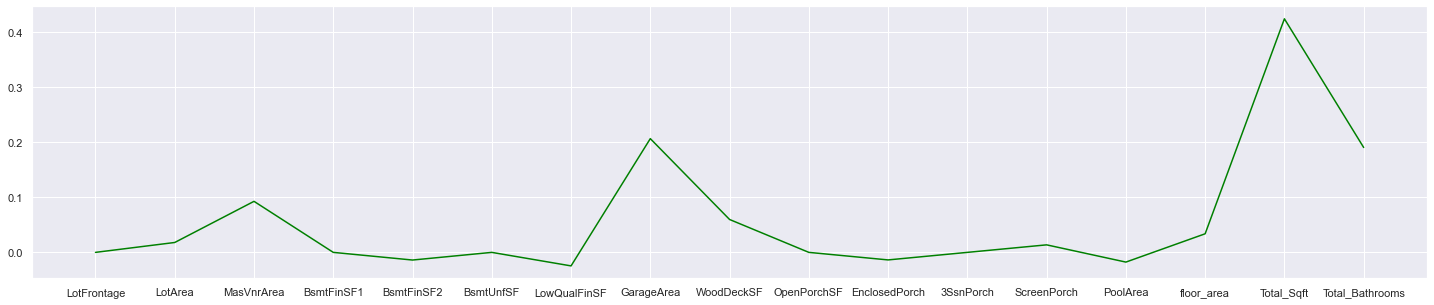

In [426]:
# Using GridSearchCV to find the best alpha value for a lasso regression model 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
param_grid = {'alpha': np.arange(0.01, 1, 0.01)}
lasso = Lasso()
grid = GridSearchCV(estimator= lasso, param_grid= param_grid, scoring= 'neg_mean_absolute_error', cv= 10)
grid.fit(X_train, Y_train)
display(grid.best_params_)
display(grid.best_estimator_.coef_)

# Displaying lasso coefficient values to feature select the best numerical values

fig = figure(figsize= (25, 5))
plt.plot(range(len(X_numeric.columns)), grid.best_estimator_.coef_, color= 'green')
plt.xticks(range(len(X_numeric.columns)), X_columns)
plt.show()

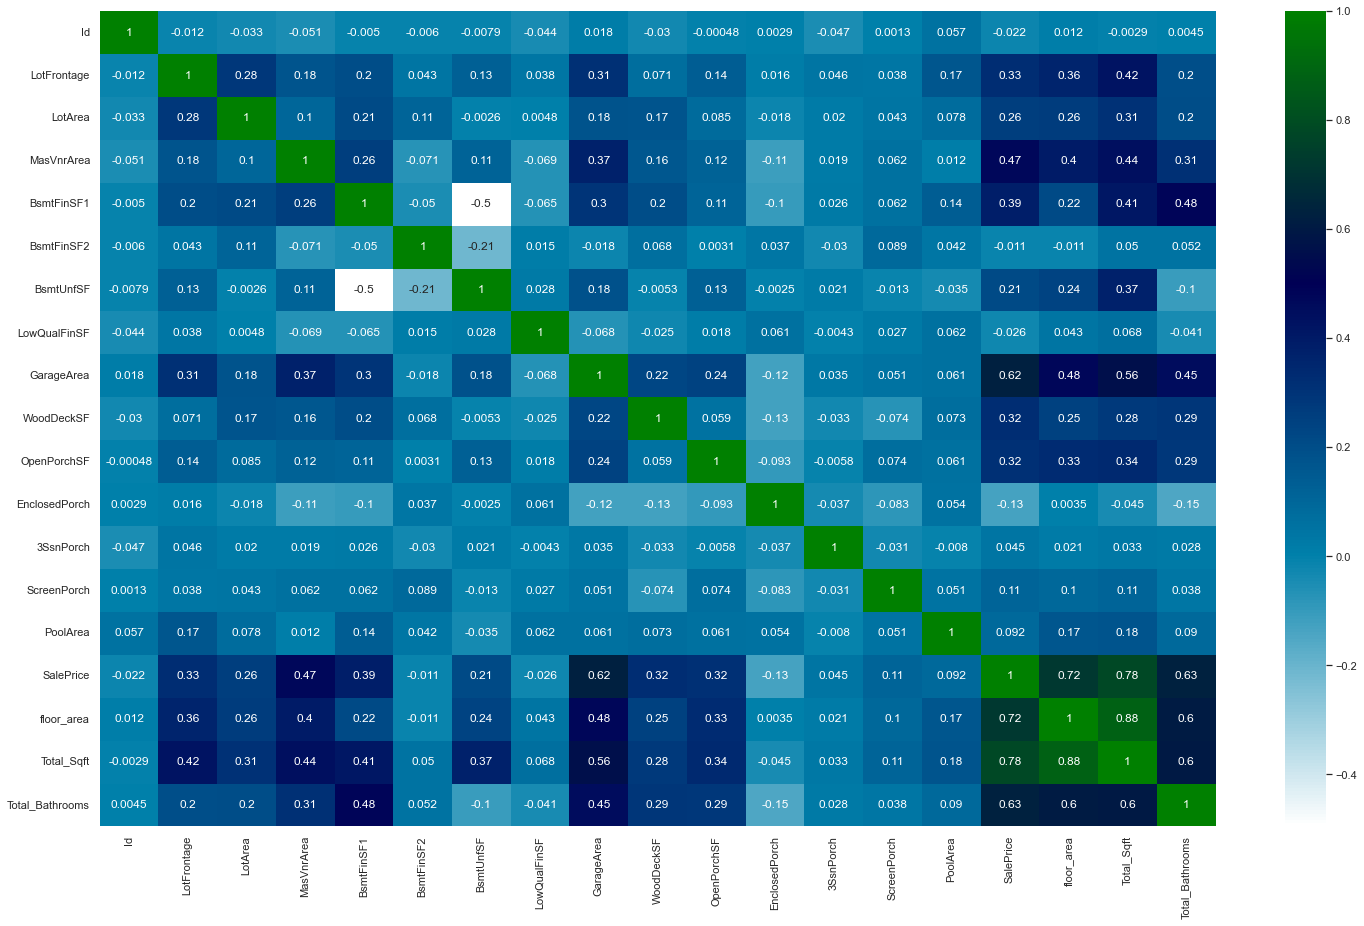

In [427]:
# Displaying the correlation of features with a heatmap to cross check lasso regression coefficients results

corr = train_df.corr()
plt.figure(figsize= (25, 15))
sns.heatmap(corr, cmap= 'ocean_r', annot= True)
plt.show()

In [428]:
# Feature selecting variables based on ANOVA test and lasso regression results for train_df
train_categorical_features = X_categorical_selection.loc[:, ['GarageCars', 'ExterQual', 'BsmtQual', 'KitchenQual', 'YearBuilt', 
'OverallQual', 'YearRemodAdd', 'Fireplaces', 'GarageFinish', 'GarageType']]  
train_numerical_features = X_numeric.loc[:, ['Total_Sqft', 'Total_Bathrooms', 'GarageArea', 
'MasVnrArea', 'WoodDeckSF', 'ScreenPorch', 'LotArea', 'floor_area']]
train_numerical_target = Y_numeric.loc[:, ['SalePrice']]

train_model = pd.concat([train_categorical_features, train_numerical_features, train_numerical_target], axis= 1)
train_model.head()

,GarageCars,ExterQual,BsmtQual,KitchenQual,YearBuilt,OverallQual,YearRemodAdd,Fireplaces,GarageFinish,GarageType,Total_Sqft,Total_Bathrooms,GarageArea,MasVnrArea,WoodDeckSF,ScreenPorch,LotArea,floor_area,SalePrice
0,2,2,2,2,104,7,53,0,2,1,-0.008372,1.642256,0.351000,0.514104,-0.752176,-0.270208,-0.207142,0.384619,0.347273
1,2,3,2,3,77,6,26,1,2,1,-0.059386,0.368581,-0.060731,-0.570750,1.626195,-0.270208,-0.091886,-0.475290,0.007288
2,2,2,2,2,102,7,52,1,2,1,0.161672,1.642256,0.631726,0.325915,-0.752176,-0.270208,0.073480,0.530497,0.536154
3,3,3,4,2,19,7,20,1,3,5,-0.121330,-0.268257,0.790804,-0.570750,-0.752176,-0.270208,-0.096897,0.398055,-0.515281
4,3,2,2,2,101,8,50,1,2,1,0.935372,1.642256,1.698485,1.366489,0.780197,-0.270208,0.375148,1.321306,0.869843


In [429]:
# Feature selecting variables based on ANOVA test and lasso regression results for train_df

test_categorical_features = test_df.loc[:, ['GarageCars', 'ExterQual', 'BsmtQual', 'KitchenQual', 'YearBuilt', 
'OverallQual', 'YearRemodAdd', 'Fireplaces', 'GarageFinish', 'GarageType']] 
test_numerical_features = test_df.loc[:, ['Total_Sqft', 'Total_Bathrooms', 'GarageArea', 
'MasVnrArea', 'WoodDeckSF', 'ScreenPorch', 'LotArea', 'floor_area']]  

In [430]:
# Label encoding test_df categorical data

test_categorical_features_columns = test_categorical_features.columns
for i in test_categorical_features_columns:
    test_categorical_features[i] = le.fit_transform(test_categorical_features[i].astype(str))

In [431]:
# Normalising numeircal test data

test_numerical_features[test_numerical_features.columns] = scaler.fit_transform(test_numerical_features[test_numerical_features.columns])
test_numerical_features.head()

,Total_Sqft,Total_Bathrooms,GarageArea,MasVnrArea,WoodDeckSF,ScreenPorch,LotArea,floor_area
0,-0.958812,-1.474576,1.185921,-0.563316,0.366678,1.818960,0.363929,-1.208835
1,0.160042,-0.873289,-0.741235,0.047057,2.347867,-0.301543,0.897861,-0.316383
2,0.031628,0.329286,0.042537,-0.563316,0.930495,-0.301543,0.809646,0.301945
3,-0.002701,0.329286,-0.012788,-0.450284,2.089451,-0.301543,0.032064,0.250418
4,0.035442,-0.272001,0.153187,-0.563316,-0.729632,2.243060,-0.971808,-0.417376


In [432]:
# Concatenating test_df's labelled categorical and nomalised numerical data

test_model = pd.concat([test_categorical_features, test_numerical_features], axis= 1)

## VII. Modelling

In [433]:
# Splitting the data into feature and target variables

X = train_model.drop('SalePrice', axis= 1)
Y = train_df['SalePrice'].values

In [434]:
# Fitting a gradient boosting regressor model using gridsearchcv for hyperparameter tuning

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 2)
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 4, 5, 6, 7], 
              'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]}
gbt = GradientBoostingRegressor()
grid = GridSearchCV(estimator= gbt, param_grid= param_grid, scoring= 'neg_mean_squared_error', cv= 10)

In [435]:
# Fitting the data and getting the best score and params

grid.fit(X_train, Y_train)
pred = grid.predict(test_model)
display(grid.best_params_)

{'max_depth': 3, 'max_features': 0.2, 'n_estimators': 300}

In [436]:
# Storing the results in 'sub' csv
sub = pd.DataFrame({
        'ID': test_df['Id'] ,
        'SalePrice': pred})
sub.to_csv('sub.csv', index= False)